In [3]:
import csv
from google.colab import files
files.upload()

Saving Indian-Female-Names.csv to Indian-Female-Names.csv


{'Indian-Female-Names.csv': b'name,gender,race\r\nshivani,f,indian\r\nisha,f,indian\r\nsmt shyani devi,f,indian\r\ndivya,f,indian\r\nmansi,f,indian\r\nmazida,f,indian\r\npooja,f,indian\r\nkajal,f,indian\r\nmeena,f,indian\r\nsonam,f,indian\r\nbuity,f,indian\r\nhina,f,indian\r\nshakshi sagar,f,indian\r\npooja,f,indian\r\nanita,f,indian\r\nneetu,f,indian\r\nanshu d/o,f,indian\r\nkanika kathuria,f,indian\r\nmanju,f,indian\r\nshakshi,f,indian\r\nanita,f,indian\r\nreena,f,indian\r\nneha,f,indian\r\nkhushboo,f,indian\r\naasmin,f,indian\r\njyoti,f,indian\r\nriya masi,f,indian\r\nrekha,f,indian\r\nleela with a child,f,indian\r\nisha,f,indian\r\ngulshan,f,indian\r\npriya jain,f,indian\r\npooja,f,indian\r\nrakhi @payal,f,indian\r\nversha,f,indian\r\nsunita,f,indian\r\nnitu kumari,f,indian\r\nvandana,f,indian\r\nroshni,f,indian\r\nparveen,f,indian\r\nversa,f,indian\r\nkavita,f,indian\r\npooja,f,indian\r\nsarojani,f,indian\r\nnagina,f,indian\r\ntapas das,f,indian\r\npriyanka,f,indian\r\nsantna,f,in

In [4]:
files.upload()

Saving Indian-Male-Names.csv to Indian-Male-Names.csv


{'Indian-Male-Names.csv': b'name,gender,race\nbarjraj,m,indian\nramdin verma,m,indian\nsharat chandran,m,indian\nbirender mandal,m,indian\namit,m,indian\nkushal,m,indian\nkasid,m,indian\nshiv prakash,m,indian\nvikram singh,m,indian\nsanjay,m,indian\nabhi,m,indian\nram dutt gupta,m,indian\nkhadak singh,m,indian\ngurmit singh,m,indian\nchanderpal,m,indian\naman,m,indian\nkhursid,m,indian\nrajeev,m,indian\ndurgesh,m,indian\nnahar singh,m,indian\nram kumar,m,indian\nsunder paal,m,indian\nmaansingh aswal,m,indian\nrohit,m,indian\nrohit,m,indian\nsparsh,m,indian\nsantosh,m,indian\nsantosh,m,indian\npunit khandelwal,m,indian\ndinesh,m,indian\ngulshan,m,indian\narvind kumar yadav,m,indian\nnausad,m,indian\ngurmit singh,m,indian\nmd. afsar,m,indian\nshiv shakti singh,m,indian\nmoti lal,m,indian\nkausal kumar,m,indian\nrohit,m,indian\nrohit,m,indian\nmohabbat ali,m,indian\nraj kumar,m,indian\njaswant singh,m,indian\nsevak @ pitambar lal,m,indian\nchotelal,m,indian\namit,m,indian\nrupesh,m,indian

In [5]:
# Loading the CSV Files
names = []
labels = []

with open('Indian-Female-Names.csv', 'r') as csvfemale:
  reader = csv.reader(csvfemale)
  for i in reader:
    names.append(i[0])
    labels.append(i[1])

with open('Indian-Male-Names.csv', 'r') as csvmale:
  reader = csv.reader(csvmale)
  for i in reader:
    names.append(i[0])
    labels.append(i[1])

print(len(names))
print(len(labels))

30229
30229


In [6]:
# Preprocessing Data

import re
final = []
delete_from = []
pattern = re.compile('[a-z]+')
for x in range(len(names)):
  temp = []
  temp = pattern.findall(names[x])
  if len(temp) > 1:
    if temp[0] == 'smt':
      final.append(temp[1])
    else:
      final.append(temp[0])
  elif len(temp) == 0:
    delete_from.append(x)
  else:
    final.append(temp[0])

print(len(final))
print(len(delete_from))

30059
170


In [7]:
# Preprocessing Data Further

count = 0
for i in delete_from:
  del labels[i - count]
  count = count + 1

print(len(labels))

30059


In [8]:
print(final[0])
print(labels[0])

del final[0]
del labels[0]

name
gender


In [9]:
# Randomizing the dataset
import random

dataset = dict(zip(final, labels))

random.shuffle(final)

data_list = [[key, dataset[key]] for key in final]
print(data_list[:5])
print(type(data_list))

[['pooja', 'm'], ['soni', 'm'], ['ashwani', 'm'], ['suman', 'm'], ['sunita', 'm']]
<class 'list'>


In [11]:
# Creating names and labels for train, validation
training_size = 25000
count = 0

training_names = []
training_labels = []
validation_names = []
validation_labels = []

for i in data_list:
  if count != training_size:
    training_names.append(i[0])
    training_labels.append(i[1])
    count = count + 1
  elif count == training_size:
    validation_names.append(i[0])
    validation_labels.append(i[1])

print(len(training_names))
print(len(training_labels))
print(len(validation_names))
print(len(validation_labels))

25000
25000
5058
5058


In [12]:
#Checking few names and labels

print(training_names[:5])
print(training_labels[:5])

['pooja', 'soni', 'ashwani', 'suman', 'sunita']
['m', 'm', 'm', 'm', 'm']


In [0]:
# Changing 'm' to 1 and 'f' to 0 and converting labels into numpy array
import numpy as np

for x in range(len(training_labels)):
  if training_labels[x] == 'm':
    training_labels[x] = 1
  elif training_labels[x] == 'f':
    training_labels[x] = 0
for x in range(len(validation_labels)):
  if validation_labels[x] == 'm':
    validation_labels[x] = 1
  elif validation_labels[x] == 'f':
    validation_labels[x] = 0

training_labels = np.array(training_labels)
validation_labels = np.array(validation_labels)

In [14]:
# Tokenizing the data
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_length = 0

for i in training_names:
  if len(i) > max_length:
    max_length = len(i)
for i in validation_names:
  if len(i) > max_length:
    max_length = len(i)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(training_names)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_names)
padded = pad_sequences(sequences, maxlen=max_length, padding='post')

validation_sequences = tokenizer.texts_to_sequences(validation_names)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding='post')

In [45]:
# Making the model
import tensorflow as tf
embedding_dims = 32
model = tf.keras.Sequential([
          tf.keras.layers.Embedding(len(data_list), embedding_dims, input_length=max_length),
          tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, activation='relu', return_sequences=True)),
          tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16, activation='relu')),
          tf.keras.layers.Dense(64, activation = 'relu'),
          tf.keras.layers.Dense(32, activation='relu'),
          tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 19, 32)            961856    
_________________________________________________________________
bidirectional_6 (Bidirection (None, 19, 128)           49664     
_________________________________________________________________
bidirectional_7 (Bidirection (None, 32)                18560     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 1,034,305
Trainable params: 1,034,305
Non-trainable params: 0
____________________________________________

In [46]:
num_epochs = 2

history = model.fit(padded, training_labels, epochs=num_epochs, validation_data=(validation_padded, validation_labels))

Train on 25000 samples, validate on 5058 samples
Epoch 1/2
25000/25000 [==============================] - 116s 5ms/sample - loss: 0.2988 - acc: 0.8594 - val_loss: 0.1835 - val_acc: 0.9150
Epoch 2/2
25000/25000 [==============================] - 116s 5ms/sample - loss: 0.0162 - acc: 0.9940 - val_loss: 0.1118 - val_acc: 0.9290


<Figure size 432x288 with 0 Axes>

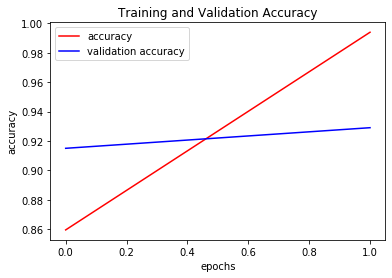

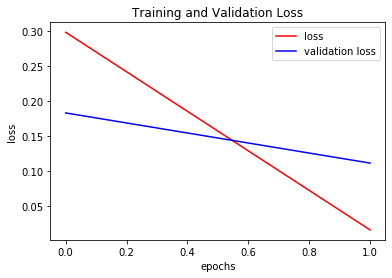

<Figure size 432x288 with 0 Axes>

In [47]:
#Visualizing training
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

#Accuracy Plot
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title("Training and Validation Accuracy")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['accuracy', 'validation accuracy'])
plt.figure()

#Loss Plot
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title("Training and Validation Loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['loss', 'validation loss'])
plt.figure()

In [0]:
#Saving the model

model.save('gender_model_LSTM.h5')

In [0]:
#Downloading Model
files.download("gender_model_LSTM.h5")

In [60]:
# Predicting with given name
name = 'isha'
tokenizer.fit_on_texts(name)
sequence = tokenizer.texts_to_sequences(name)
pad = pad_sequences(sequence, maxlen=max_length, padding='post')

weight = model.predict_proba(pad)
print(weight)

if np.average(weight) > 0.5:
  print("male")
else:
  print("female")

[[0.9999896]
 [0.       ]
 [0.9999713]
 [0.       ]]
female
